In [1]:
# import necessary packages
import openeo

# connect with the backend
eoconn = openeo.connect("openeofed.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [2]:
# Setup process parameters
spat_ext = {
    "type": "Polygon",
    "coordinates": [
        [
            [
                5.170012098271149,
                51.25062964728295
            ],
            [
                5.17085904378298,
                51.24882567194015
            ],
            [
                5.17857421368097,
                51.2468515482926
            ],
            [
                5.178972704726344,
                51.24982704376254
            ],
            [
                5.170012098271149,
                51.25062964728295
            ]
        ]
    ]
}
temp_ext = ["2022-01-01", "2022-12-31"]
smoothing_lambda = 10000

In [3]:
# Create a processing graph from the Whittaker process using an active openEO connection
whittaker = eoconn.datacube_from_process(
      "whittaker",
       namespace="https://raw.githubusercontent.com/VITObelgium/openeo_algorithm_catalog/c025cdd72d8c3e97e11412774f440fcdf675dca6/whittaker/openeo_udp/whittaker.json",
        spatial_extent=spat_ext,
        temporal_extent=temp_ext,
       smoothing_lambda=smoothing_lambda
       )

In [4]:
whittaker_job = whittaker.create_job(title="Whittaker Smoothing")
whittaker_job.start_and_wait()

0:00:00 Job 'cdse-j-251126134332410088bcec4b5618b4c1': send 'start'
0:00:14 Job 'cdse-j-251126134332410088bcec4b5618b4c1': created (progress 0%)
0:00:20 Job 'cdse-j-251126134332410088bcec4b5618b4c1': created (progress 0%)
0:00:26 Job 'cdse-j-251126134332410088bcec4b5618b4c1': created (progress 0%)
0:00:34 Job 'cdse-j-251126134332410088bcec4b5618b4c1': created (progress 0%)
0:00:44 Job 'cdse-j-251126134332410088bcec4b5618b4c1': queued (progress 0%)
0:00:57 Job 'cdse-j-251126134332410088bcec4b5618b4c1': queued (progress 0%)
0:01:13 Job 'cdse-j-251126134332410088bcec4b5618b4c1': queued (progress 0%)
0:01:32 Job 'cdse-j-251126134332410088bcec4b5618b4c1': queued (progress 0%)
0:01:57 Job 'cdse-j-251126134332410088bcec4b5618b4c1': running (progress N/A)
0:02:27 Job 'cdse-j-251126134332410088bcec4b5618b4c1': running (progress N/A)
0:03:04 Job 'cdse-j-251126134332410088bcec4b5618b4c1': running (progress N/A)
0:03:51 Job 'cdse-j-251126134332410088bcec4b5618b4c1': running (progress N/A)
0:04:50 

<BatchJob job_id='cdse-j-251126134332410088bcec4b5618b4c1'>

In [6]:
results = whittaker_job.get_results()
results.download_files("output/whittaker/")

[PosixPath('output/whittaker/timeseries.json'),
 PosixPath('output/whittaker/job-results.json')]

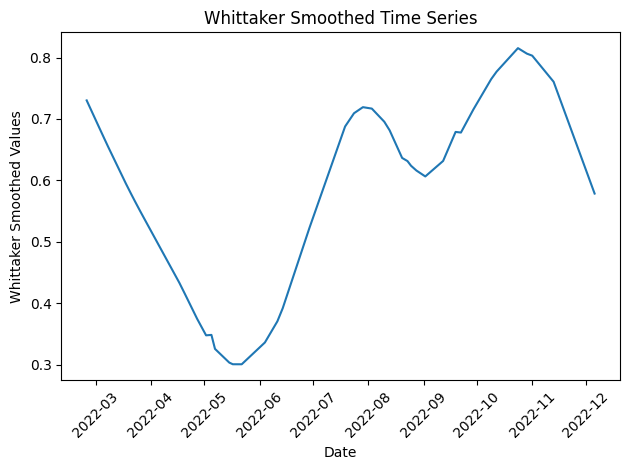

In [7]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# read the json results into a pandas dataframe
with open('output/whittaker/timeseries.json', 'r') as f:
    results = json.load(f)

# dict to dataframe
df = pd.DataFrame({
    "date": pd.to_datetime(list(results.keys())),
    "values":[v[0][0] for v in list(results.values())]
})

df = df.sort_values(by='date')

plt.plot(df['date'], df['values'])
plt.xlabel('Date')
plt.ylabel('Whittaker Smoothed Values')
plt.title('Whittaker Smoothed Time Series')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
